In [1]:
# Exponential moving average (EMA) implementation

import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:
def download_data(stock, start, end):
    data = {}
    ticker =  yf.download(stock, start, end)
    data['Price'] = ticker['Adj Close']
    return pd.DataFrame(data)

In [5]:
def construct_signals(data, short_period, long_period):
    data['Short EMA'] =  data['Price'].ewm(span=short_period, adjust = False).mean()
    data['Long EMA']  =  data['Price'].ewm(span=long_period, adjust = False).mean()

In [8]:
def plot_data(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['Price'], label='Stock Price', color = 'black')
    plt.plot(data['Short EMA'], label='Short EMA', color = 'red')
    plt.plot(data['Long EMA'], label='Long EMA', color = 'blue')
    plt.title('Moving Average (MA) Indicators')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed
                Price  Short EMA   Long EMA
Date                                       
2010-01-04  91.506264  91.506264  91.506264
2010-01-05  90.400902  91.462916  91.495265
2010-01-06  89.813629  91.398238  91.478532
2010-01-07  89.502716  91.323904  91.458873
2010-01-08  90.400902  91.287708  91.448345


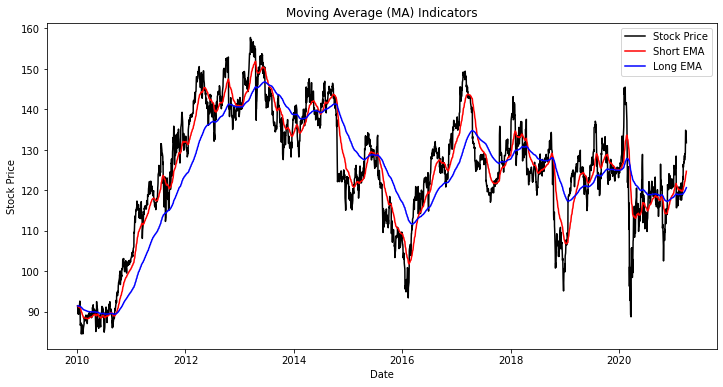

In [9]:
if __name__ == '__main__':
    
    start_date = datetime.datetime(2010, 1, 1)
    end_date   = datetime.datetime(2021, 4, 1)
    
    stock_data = download_data('IBM', start_date, end_date)
    construct_signals(stock_data, 50, 200)
    stock_data.dropna(how='any', inplace= True)
    print(stock_data.head(5))
    plot_data(stock_data)